In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

In [63]:
from pathlib import Path

def mkdir_secure(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [64]:
dpi = 300

In [65]:
pids = ['BK7610',
        'BU4707',
        'CC6740',
        'DC6359',
        'DK3500',
        'HV0618',
        'JB3156',
        'JR8022',
        'MC7070',
        'MJ8002',
        'PC6771',
        'SA0297',
        'SF3079']

In [66]:
pid = pids[3]

In [67]:
no_gaps_path = os.path.join('..','data','interim','no_gaps') 

In [68]:
fig_path = os.path.join('..','reports','figures')

# 1. Accelerometer

In [69]:
acc_data_path = os.path.join('..', 'data', 'interim', 'acc_data') 
df_acc = pd.read_csv(os.path.join(acc_data_path, f'{pid}.csv'), dtype={'x': np.float32, 'y': np.float32, 'z': np.float32})

In [70]:
acc_fig_path = os.path.join('..','figs','acc')
mkdir_secure(acc_fig_path)

In [71]:
df_acc['timestamp'] = pd.to_datetime(df_acc['timestamp'],unit='ms')

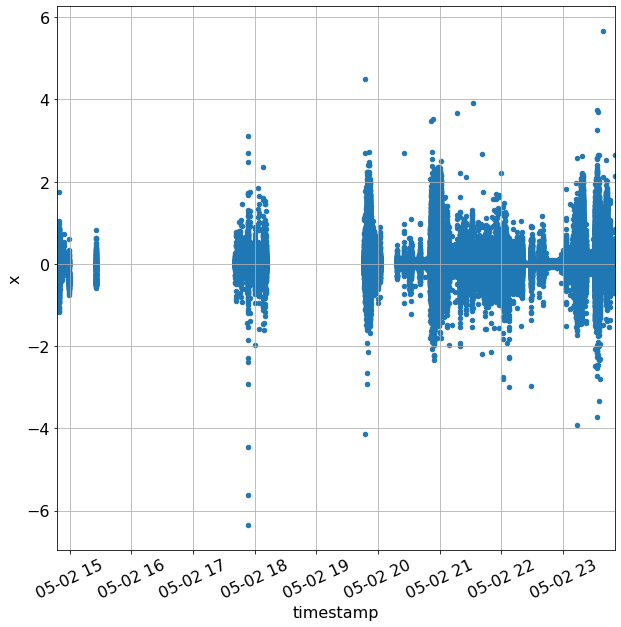

In [72]:
ax = df_acc.plot.scatter(x='timestamp',y='x',grid=True)
ax.set_xlim(df_acc.timestamp[0],df_acc.timestamp.iloc[-1])
plt.xticks(rotation=25)
plt.savefig(os.path.join(fig_path,f'{pid}_acc_x.png'),dpi=dpi)

# ax = df_acc.plot.scatter(x='timestamp',y='y',c= 'darkmagenta',grid=True)
# ax.set_xlim(df_acc.timestamp[0],df_acc.timestamp.iloc[-1])
# plt.savefig(os.path.join(fig_path,f'{pid}_acc_y.png'),dpi=dpi)

# ax = df_acc.plot.scatter(x='timestamp',y='z',c= 'orangered',grid=True)
# ax.set_xlim(df_acc.timestamp[0],df_acc.timestamp.iloc[-1])
# plt.savefig(os.path.join(fig_path,f'{pid}_acc_z.png'),dpi=dpi)

plt.show()

In [73]:
# df_acc.plot(x='timestamp',y=['x','y','z'],grid=True)
# plt.savefig(os.path.join(fig_path,f'{pid}_acc_xyz.png'),dpi=dpi)
# plt.show()

# 2.1 TAC Clean

In [74]:
tac_data_path = os.path.join('..', 'data', 'interim', 'tac_data') 
df_tac = pd.read_csv(os.path.join(tac_data_path, f'{pid}.csv'),parse_dates=['timestamp'])

In [75]:
tac_fig_path = os.path.join('..','figs','tac')
mkdir_secure(tac_fig_path)

In [76]:
df_tac['timestamp'] = pd.to_datetime(df_tac.timestamp,unit='ms')

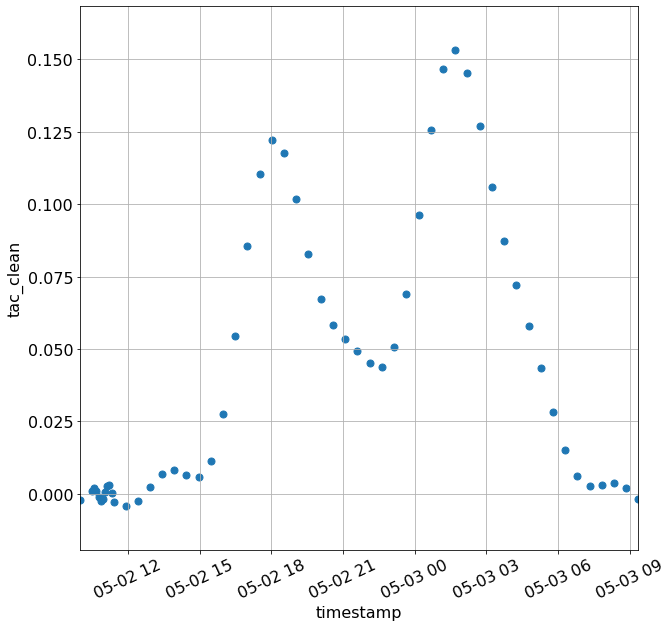

In [77]:
clean_1st = df_tac['tac_clean'].first_valid_index()
clean_last = df_tac['tac_clean'].last_valid_index()
# x_clean = df_tac[df_tac['tac_clean'].notnull()]
# t_clean = x_clean.tac_clean

# c=t_clean,colormap='viridis'
ax = df_tac.plot.scatter(x='timestamp',y='tac_clean', s = 49,grid=True)
ax.set_xlim(df_tac['timestamp'][clean_1st], df_tac['timestamp'][clean_last])
plt.xticks(rotation=25)
# ax.set_xlabel('Time')
# ax.set_ylabel('TAC Level')
plt.savefig(os.path.join(fig_path,f'{pid}_tac_clean.png'),dpi=dpi)

# 2.2 TAC Raw

In [78]:
# raw_1st = df_tac['tac_raw'].first_valid_index()
# raw_last = df_tac['tac_raw'].last_valid_index()
# x_raw = df_tac[df_tac['tac_raw'].notnull()]
# t_raw = x_raw.tac_raw
#, c=t_raw, colormap='viridis'
# ax = x_raw.plot.scatter(x='timestamp',y='tac_raw', c='darkmagenta', s = 49, grid=True)
# ax.set_xlim(df_tac['timestamp'][raw_1st], df_tac['timestamp'][raw_last])
# plt.savefig(os.path.join(fig_path,f'{pid}_tac_raw.png'),dpi=dpi)

# 3.1 Merged And Resampled  (ACC)

In [79]:
full_data_cut_path = os.path.join('..', 'data', 'interim', 'full_data_resampled') 
df_merge = pd.read_feather(os.path.join(full_data_cut_path,f'{pid}.feather'))
dfm1 = df_merge.copy()
# dfm1['timestamp'] = dfm1['timestamp'].dt.hour

In [80]:
merged_fig_path = os.path.join('..','figs','merged')
mkdir_secure(merged_fig_path)

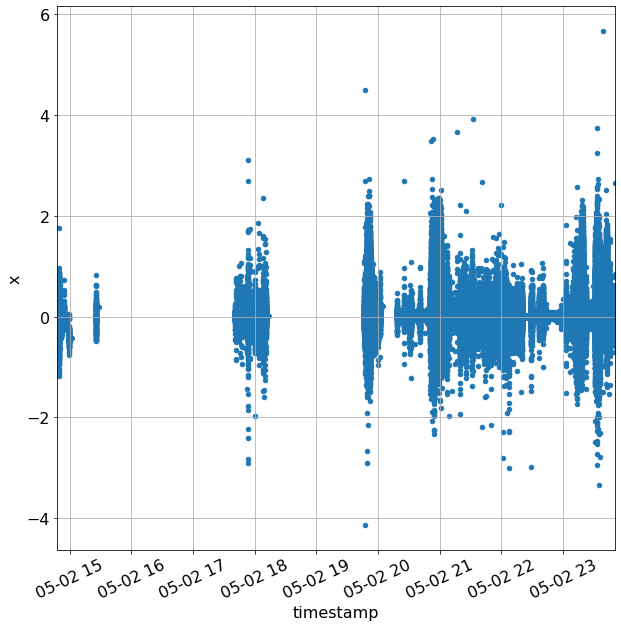

In [81]:
ax = dfm1.plot.scatter(x='timestamp',y='x',grid=True)
ax.set_xlim(dfm1.timestamp[0],dfm1.timestamp.iloc[-1])
plt.xticks(rotation=25)
plt.savefig(os.path.join(fig_path,f'{pid}_merged_x.png'),dpi=dpi)


# ax = dfm1.plot.scatter(x='timestamp',y='y',c= 'darkmagenta',grid=True)
# ax.set_xlim(dfm1.timestamp[0],dfm1.timestamp.iloc[-1])
# plt.savefig(os.path.join(fig_path,f'{pid}_merged_y.png'),dpi=dpi)


# ax = dfm1.plot.scatter(x='timestamp',y='z',c= 'orangered',grid=True)
# ax.set_xlim(dfm1.timestamp[0],dfm1.timestamp.iloc[-1])
# plt.savefig(os.path.join(fig_path,f'{pid}_merged_z.png'),dpi=dpi)

plt.show()

In [82]:
# dfm1.plot(x='timestamp',y=['x','y','z'],grid=True)
# plt.savefig(os.path.join(fig_path,f'{pid}_merged_xyz.png'),dpi=dpi)
# plt.show()

# 3.2 Merged And Resampled  (TAC Clean)

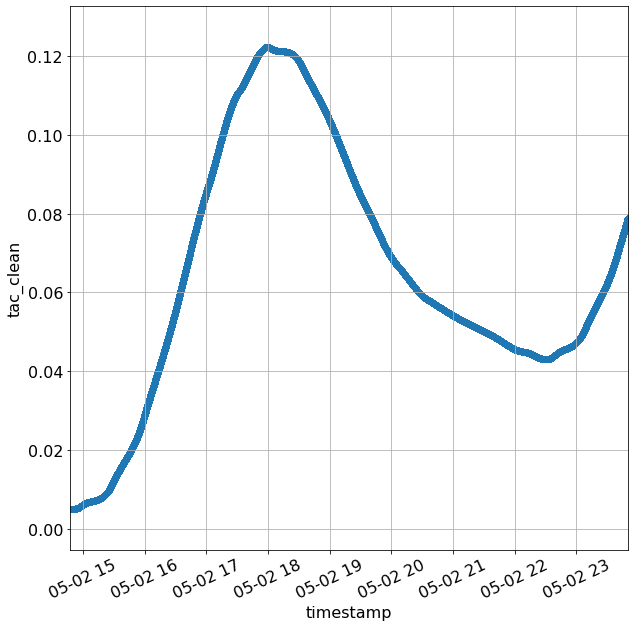

In [83]:
x_1st = dfm1['tac_clean'].first_valid_index()
x_last = dfm1['tac_clean'].last_valid_index()
# x_nn = dfm1[dfm1['tac_clean'].notnull()]
ax = dfm1.plot.scatter(x='timestamp',y='tac_clean',grid=True)
ax.set_xlim(dfm1.timestamp[x_1st],dfm1.timestamp[x_last])
plt.xticks(rotation=25)
plt.savefig(os.path.join(fig_path,f'{pid}_merged_clean.png'),dpi=dpi)

# 3.2 Merged And Resampled  (TAC Raw)

In [84]:
# x_1st = dfm1['tac_raw'].first_valid_index()
# x_last = dfm1['tac_raw'].last_valid_index()
# x_nn = dfm1[dfm1['tac_raw'].notnull()]
# ax = dfm1.plot.scatter(x='timestamp',y='tac_raw',c='darkmagenta',grid=True)
# ax.set_xlim(dfm1.timestamp[x_1st],dfm1.timestamp[x_last])
# plt.savefig(os.path.join(fig_path,f'{pid}_merged_raw.png'),dpi=dpi)

# 4.1 Interpolated Resampled, Gaps Removed (ACC)

In [85]:
part = 5

In [86]:
no_gaps_path_resampled = os.path.join('..','data','interim','no_gaps_resampled') 
df_final = pd.read_feather(os.path.join(no_gaps_path_resampled, f'{pid}_{part}.feather'))

In [87]:
full_fig_path = os.path.join('..','figs','full')
mkdir_secure(full_fig_path)

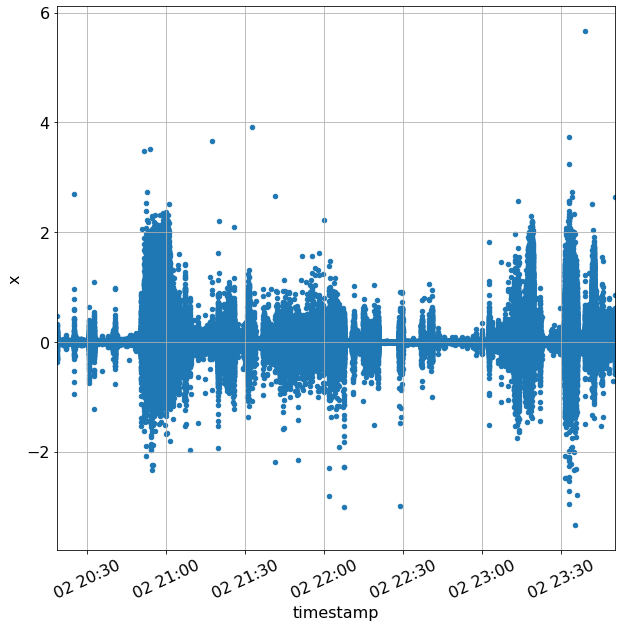

In [88]:
ax = df_final.plot.scatter(x='timestamp',y='x',grid=True)
ax.set_xlim(df_final.timestamp[0],df_final.timestamp.iloc[-1])
plt.xticks(rotation=25)
plt.savefig(os.path.join(fig_path,f'{pid}_full_x.png'),dpi=dpi)

# ax = df_final.plot.scatter(x='timestamp',y='y',grid=True,c= 'darkmagenta')
# ax.set_xlim(df_final.timestamp[0],df_final.timestamp.iloc[-1])
# plt.savefig(os.path.join(fig_path,f'{pid}_full_y.png'),dpi=dpi)

# ax = df_final.plot.scatter(x='timestamp',y='z',grid=True,c= 'orangered')
# ax.set_xlim(df_final.timestamp[0],df_final.timestamp.iloc[-1])
# plt.savefig(os.path.join(fig_path,f'{pid}_full_z.png'),dpi=dpi)

plt.show()

In [89]:
# ax = df_final.plot(x='timestamp',y=['x','y','z'],grid=True)
# plt.savefig(os.path.join(fig_path,f'{pid}_full_xyz.png'),dpi=dpi)

# 4.2 Interpolated Resampled, Gaps Removed (TAC Clean)

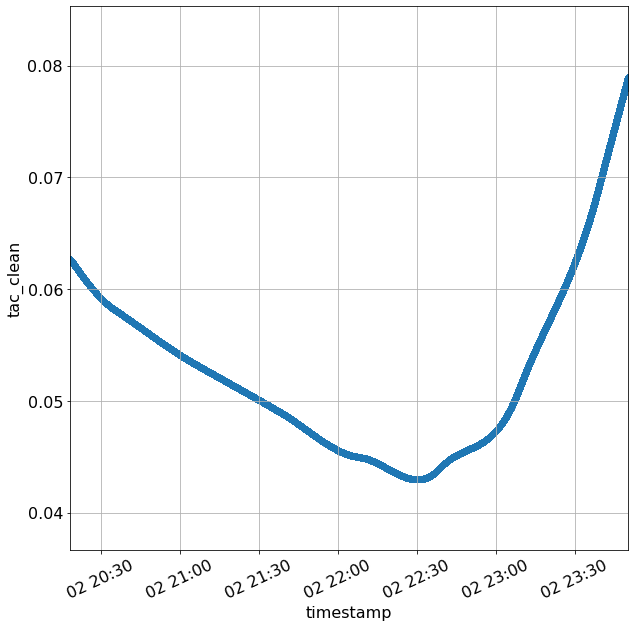

In [90]:
cl_1st = df_final['tac_clean'].first_valid_index()
cl_last = df_final['tac_clean'].last_valid_index()
# ,c=df_final['tac_clean'],colormap='viridis'
ax = df_final.plot.scatter(x='timestamp',y='tac_clean',grid=True)
ax.set_xlim(df_final.timestamp[cl_1st],df_final.timestamp[cl_last])
plt.xticks(rotation=25)

plt.savefig(os.path.join(fig_path,f'{pid}_full_clean.png'),dpi=dpi)
plt.show()

# 4.3 Interpolated Resampled, Gaps Removed (TAC Raw)

In [91]:
# rw_1st = df_final['tac_raw'].first_valid_index()
# rw_last = df_final['tac_raw'].last_valid_index()
# ax = df_final.plot.scatter(x='timestamp',y='tac_raw',c='purple',grid=True)
# ax.set_xlim(df_final.timestamp[rw_1st],df_final.timestamp[rw_last])
# plt.savefig(os.path.join(fig_path,f'{pid}_full_raw.png'),dpi=dpi)
# plt.show()